In [1]:
import sys
import tensorflow as tf
import numpy as np
sys.path.insert(0, './scripts')
from tqdm import tqdm
import feature_tools as ft

#init params
NN_MODEL = 'lang2vec'
INPUT_DIM = 40
is_batchnorm = False
SOFTMAX_NUM = 17
nn_model = __import__(NN_MODEL)
FEAT_TYPE='mfcc'
N_FFT=400
HOP=160
VAD=True
CMVN='m'
DATA_ROOT='/your_own_folder'


#init placeholder
test_feat_batch = tf.placeholder(tf.float32, [None,None,np.int(INPUT_DIM)],name="test_feat_batch")
test_label_batch = tf.placeholder(tf.int32, [None],name="test_label_batch")
test_shape_batch = tf.placeholder(tf.int32, [None,2],name="test_shape_batch")

#init model
emnet_validation = nn_model.nn(test_feat_batch,test_label_batch,test_label_batch,test_shape_batch, SOFTMAX_NUM,False,INPUT_DIM,is_batchnorm);
tf.get_variable_scope().reuse_variables()
sess = tf.InteractiveSession()
saver = tf.train.Saver()
tf.initialize_all_variables().run()

#load pretrained model
RESUME_STARTPOINT = 7712000
saver.restore(sess,'data/pretrained_model/model'+str(RESUME_STARTPOINT)+'.ckpt-'+str(RESUME_STARTPOINT))

/data/sls/u/swshon/virtualenv_18/pytf/local/lib/python2.7/site-packages/librosa/__init__.py:40: DeprecationWarning: You are using librosa with Python 2. Please note that librosa 0.7 will be the last version to support Python 2, after which it will require Python 3 or later.
  DeprecationWarning)
W1122 12:47:57.507527 140143317190464 deprecation_wrapper.py:119] From ./scripts/lang2vec.py:8: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1122 12:47:57.522263 140143317190464 deprecation_wrapper.py:119] From ./scripts/lang2vec.py:116: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1122 12:47:58.589189 140143317190464 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (fo

Tensor("softmax/transpose:0", shape=(?, ?, ?), dtype=float32)
Tensor("softmax/transpose_1:0", shape=(?, ?, ?), dtype=float32)
Tensor("softmax/transpose_2:0", shape=(?, ?, ?), dtype=float32)
Tensor("softmax/transpose_3:0", shape=(?, ?, ?), dtype=float32)
Tensor("softmax/Mul:0", shape=(?, ?, 1000), dtype=float32)
(?, 3000)
(?, 1500)
(?, 600)


W1122 12:48:00.076483 140143317190464 deprecation.py:323] From /data/sls/u/swshon/virtualenv_18/pytf/local/lib/python2.7/site-packages/tensorflow/python/util/tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
W1122 12:48:00.753942 140143317190464 deprecation.py:323] From /data/sls/u/swshon/virtualenv_18/pytf/local/lib/python2.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [2]:
wav_list = ['/data/sls/arabic/corpus/mgb5/adi/dev_segments/2XwBQJ7eHKs_056439-057583.wav']

#feature extraction
feat, _, utt_shape, tffilename = ft.feat_extract(wav_list,FEAT_TYPE,N_FFT,HOP,VAD,CMVN,0)

#extract output layer
output = []
for iter in tqdm(range(len(feat))):
    o1 = emnet_validation.o1.eval({test_feat_batch:[feat[iter]], test_shape_batch:[utt_shape[iter]]})
    output.extend([o1])
output = np.squeeze(output)

print output

100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

[12.810355    2.6798737   4.2583055  -1.5822484  -0.77033234 -1.9868536
 -3.5719857  -0.6957663   0.92964137  3.286277   -0.15940854 -4.2814565
 -3.185078   -1.564724   -0.43759388  2.4331825  -5.155079  ]


Text(0.5,1,u'Dialect identification offline test result')

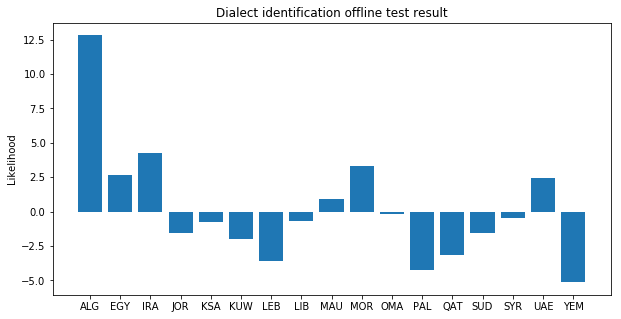

In [3]:
dialects = []
for line in open('data/language_id_initial').readlines():
    dialects.append(line.rstrip().split()[0])

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
%matplotlib inline

x = np.arange(17)
plt.figure(figsize=(10, 5))
plt.bar(x,output,align='center')
plt.xticks(x,dialects)
plt.ylabel('Likelihood')
plt.title('Dialect identification offline test result')